# **Spotify Playlist Analysis**

# **90s Rock Anthems Playlist**

**This is an example project to retrieve data from spotify using Spotify Api, Python, and Spotipy library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

**Connect to the Spotify API**

In [3]:
client_id = 'Your client_id'
client_secret = 'Your client_secret'

In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)

In [5]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

**Get Track IDs**

In [6]:
def show_tracks(results, uriArray):
    for i, item in enumerate(results['items']):
        track = item['track']
        uriArray.append(track['id'])

In [7]:
def track_id(username, playlist_id):
    trackID = []
    results = sp.user_playlist(username, playlist_id)
    tracks = results['tracks']
    show_tracks(tracks, trackID)
    while tracks['next']:
        tracks = sp.next(tracks)
        show_tracks(tracks, trackID)
    return trackID

In [8]:
ids = track_id('Spotify', '37i9dQZF1DX1rVvRgjX59F')

In [9]:
len(ids)

151

In [10]:
ids[1]

'2IZZqH4K02UIYg5EohpNHF'

**Get Track Features data**

In [11]:
song_info = sp.track(ids[1])
song_info

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7t0rwkOPGlDPEhaOcVtOt9'},
    'href': 'https://api.spotify.com/v1/artists/7t0rwkOPGlDPEhaOcVtOt9',
    'id': '7t0rwkOPGlDPEhaOcVtOt9',
    'name': 'The Cranberries',
    'type': 'artist',
    'uri': 'spotify:artist:7t0rwkOPGlDPEhaOcVtOt9'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/5GugLrmYMl5VRoe2zNgLGp'},
  'href': 'https://api.spotify.com/v1/albums/5GugLrmYMl5VRoe2zNgLGp',
  'id': '5GugLrmYMl5VRoe2zNgLGp',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b273e2213d84fabb15100c425198',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e02e2213d84fabb15100c425198',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d00004851e2213d84fabb15100c425198',
    'width': 64}],
  'name': 'No Need To Argue',
  'release_date': '1994-10-03',
  're

In [12]:
song_features = sp.audio_features(ids[1])
song_features

[{'danceability': 0.307,
  'energy': 0.635,
  'key': 7,
  'loudness': -8.957,
  'mode': 1,
  'speechiness': 0.0339,
  'acousticness': 0.0154,
  'instrumentalness': 0.00483,
  'liveness': 0.366,
  'valence': 0.304,
  'tempo': 166.973,
  'type': 'audio_features',
  'id': '2IZZqH4K02UIYg5EohpNHF',
  'uri': 'spotify:track:2IZZqH4K02UIYg5EohpNHF',
  'track_href': 'https://api.spotify.com/v1/tracks/2IZZqH4K02UIYg5EohpNHF',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2IZZqH4K02UIYg5EohpNHF',
  'duration_ms': 306427,
  'time_signature': 4}]

In [13]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, 
             acousticness, danceability, energy, instrumentalness, liveness, loudness, 
             speechiness, tempo, time_signature]
    return track

In [14]:
tracks = []
for i in range(len(ids)):
    track = getTrackFeatures(ids[i])
    tracks.append(track)

**Save to csv**

In [15]:
df = pd.DataFrame(tracks, columns = [
    'name', 'album', 'artist', 'release_date', 'length', 'popularity', 
    'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'time_signature'])
df.to_csv("90sRock_playlist.csv", sep = ',')

In [16]:
df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Smells Like Teen Spirit,Nevermind (Remastered),Nirvana,1991-09-26,301920,78,0.000025,0.502,0.912,0.000173,0.1060,-4.556,0.0564,116.761,4
1,Zombie,No Need To Argue,The Cranberries,1994-10-03,306426,24,0.015400,0.307,0.635,0.004830,0.3660,-8.957,0.0339,166.973,4
2,Enter Sandman,Metallica,Metallica,1991-08-12,331573,0,0.002060,0.579,0.824,0.009030,0.0590,-8.710,0.0300,123.331,4
3,Under the Bridge,Blood Sugar Sex Magik (Deluxe Edition),Red Hot Chili Peppers,1991-09-24,264306,81,0.057600,0.559,0.345,0.000105,0.1410,-13.496,0.0459,84.581,4
4,Killing In The Name,Rage Against The Machine - XX (20th Anniversar...,Rage Against The Machine,1992,313573,78,0.026600,0.466,0.833,0.000000,0.0327,-4.215,0.3040,88.785,4


**EXPLORATORY DATA ANALYSIS**

In [30]:
df['release_date'].unique()

array(['1991-09-26', '1994-10-03', '1991-08-12', '1991-09-24', '1992',
       '1991', '1995-10-02', '1997-09-29', '1994-03-09', '1997-02-10',
       '1991-03-12', '1991-08-27', '1995', '2003-11-10', '1999-01-01',
       '1993-04-23', '1994-03-01', '1995-10-10', '1994-02-01',
       '1994-04-08', '1995-03-28', '1999-10-26', '1994-05-10',
       '1993-01-01', '1996-07-30', '1991-09-17', '1994-03-08',
       '1993-03-09', '1993', '1994-03-29', '1994-05-23', '1994-12-06',
       '1998-01-01', '1992-01-01', '1990-02-13', '2003-01-01',
       '1994-01-01', '1995-06-09', '1997-04-08', '1993-09-21',
       '1997-05-28', '1989', '1991-11-18', '1997-05-20', '1996-04-16',
       '1995-10-24', '2016-04-16', '1994', '1996-08-06', '1999-03-02',
       '1995-01-01', '1994-11-01', '1994-06-07', '1999-08-23',
       '1995-12-12', '1992-09-29', '1996-09-17', '1990', '2006-01-01',
       '1993-10-19', '1995-09-05', '1995-03-27', '1998', '1997',
       '1990-08-01', '1996-01-01', '1993-07-16', '2011-01-01

In [27]:
df['release_date'][4].split('-')[0]

'1992'

In [40]:
df['release_year'] = df['release_date'].apply(lambda x: x.split('-')[0]).astype(int)

Text(0.5, 1.0, 'Song Popularity')

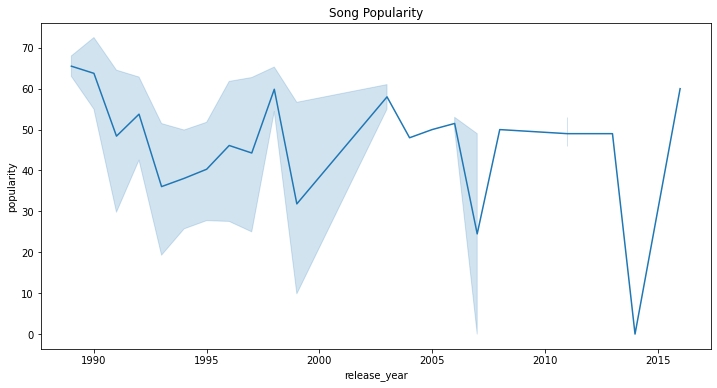

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['release_year'], y=df['popularity'], sort=True)
plt.title('Song Popularity')

Text(0.5, 1.0, 'Song Acousticness')

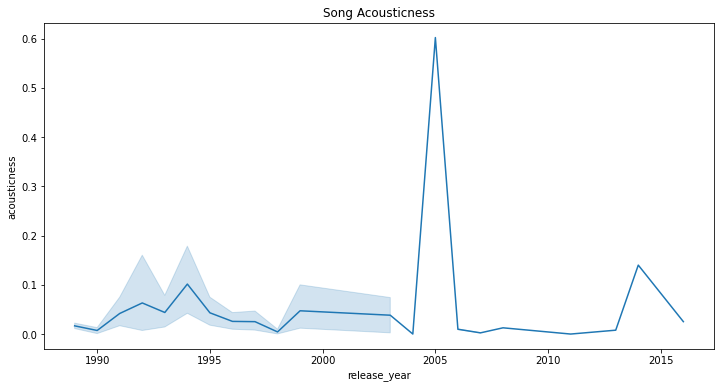

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['release_year'], y=df['acousticness'], sort=True)
plt.title('Song Acousticness')

Text(0.5, 1.0, 'Song Danceability')

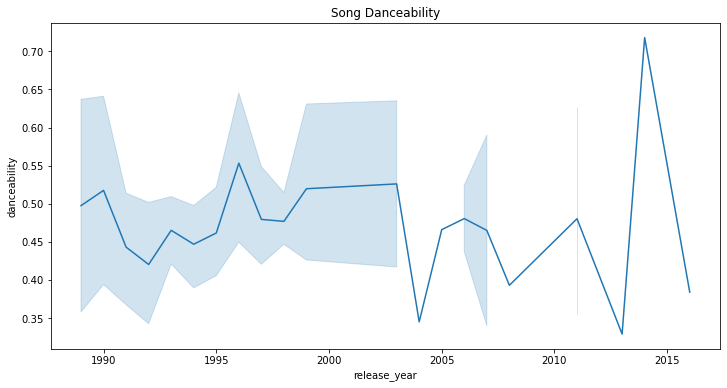

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['release_year'], y=df['danceability'], sort=True)
plt.title('Song Danceability')

Text(0.5, 1.0, 'Song Energy')

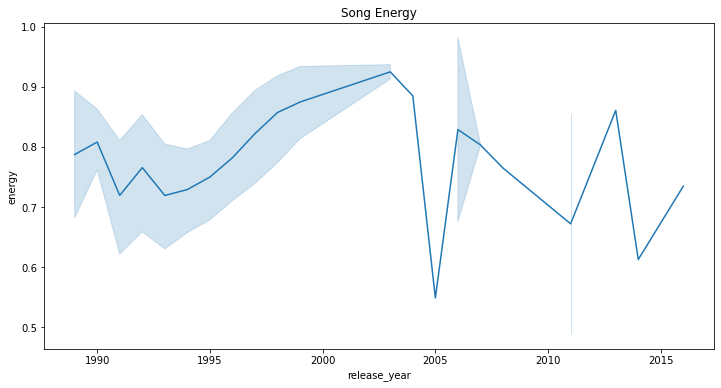

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['release_year'], y=df['energy'], sort=True)
plt.title('Song Energy')

In [86]:
popularity=df[['artist', 'popularity', 'release_year']].sort_values(by='popularity', ascending=False).iloc[:20]

In [87]:
popularity

,artist,popularity,release_year
3,Red Hot Chili Peppers,81,1991
28,Guns N' Roses,79,1991
49,Nirvana,78,1993
55,Foo Fighters,78,1997
0,Nirvana,78,1991
4,Rage Against The Machine,78,1992
53,U2,77,1991
10,Blur,77,1997
9,Soundgarden,76,1994
13,The Smashing Pumpkins,76,1995


Text(0.5, 1.0, '20 Most Popular Artists')

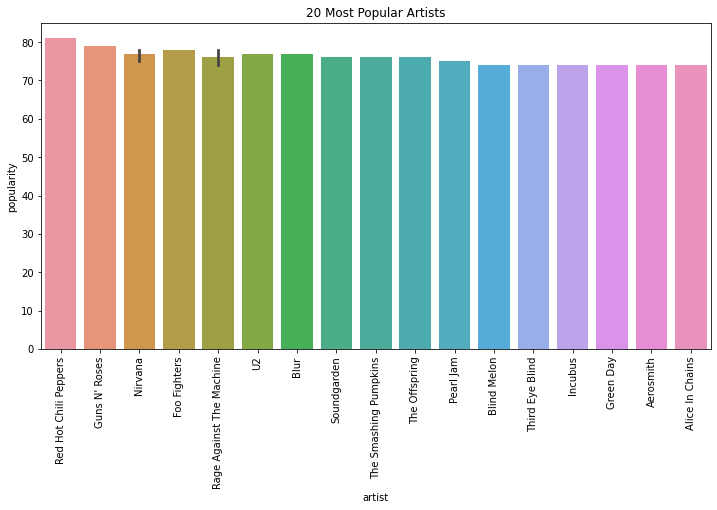

In [91]:
plt.figure(figsize=(12,6))
sns.barplot(data=popularity, x='artist', y='popularity')
plt.xticks(rotation=90)
plt.title('20 Most Popular Artists')

<AxesSubplot:>

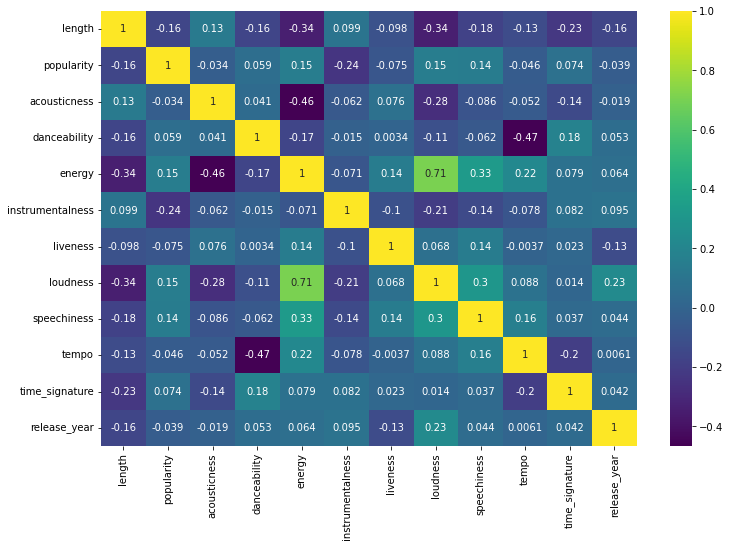

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')